<H1 style="text-align: center">Christopher Walton</H1>
<H2 style="text-align: center">Large Margin Classifiers</H2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from cvxopt import matrix
from cvxopt import solvers

## Part 1. Constrained optimisation with equality constraints

Solving an optimisation problem with equality constraintsm where the problem is defined for a two-dimensional $\mathbf{x} = (x_1, x_2)^T$ as follows:
\begin{align*}
    \mbox{min}_\mathbf{x} ~~ f(\mathbf{x}) &= x_1^2+ 3x_2^2\\
    \text{such that}\qquad & x_1 + x_2 = 1
\end{align*}

(-1.0, 2.0, -1.0, 2.0)

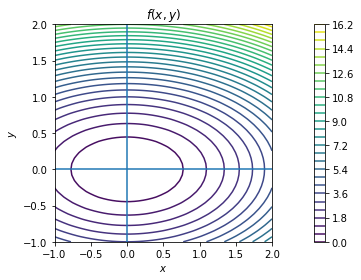

In [2]:
#Step 1.
#Below is a contour plot of $f(\mathbf{x})$ with constrainst drawn upon it.

#Implementing function as defined.
f = lambda x,y: x*x + 3*y*y

#Initialising values.
x,y = np.linspace(-1, 2, 50), np.linspace(-1, 2, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)

#Plotting the optimisation problem.
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
plt.contour(X, Y, F, 30)
plt.colorbar()
plt.axis('scaled')

##### Writing down the contraints in standard form $h(\mathbf{x}) = 0$ along with the Lagrangian, $L(\mathbf{x}, \nu)$.

$f(x) = x_1^2 + 3x_2^2$ s.t. $x_1+x_2 = 1$, 

$h(x) = x_1+x_2 -1 = 0$

$L(x,\upsilon,\lambda) = f_0(x) + \sum_{i=1}^m \lambda_i f_i(x) + \sum_{i=1}^p \upsilon_i h_i(x)$

There are no inequality constrains, only equality constraints therefore m = 0 and p = 1

$L(x,\upsilon) = f_0(x) + \upsilon h_1(x) = x_1^2 + 3x_2^2 + \upsilon(x_1+x_2 -1)$

#####  Minimising the unconstrained problem by minimising $L(\mathbf{x}, \nu)$ with respect to $\mathbf{x}$ and $\nu$.  This is done by setting the partial derivatives with respect to $x_1$, $x_2$ and $\nu$ to zero and solving for $x_1$, $x_2$ and $\nu$.

$L(x,\upsilon) = f_0(x) + \upsilon h_1(x) = x_1^2 + 3x_2^2 + \upsilon(x_1+x_2 -1)$

$L_{x_1} = 2x_1 + \upsilon = 0 \Longrightarrow x_1 = -\frac{1}{2}\upsilon$   

$L_{x_2} = 6x_2 + \upsilon = 0 \Longrightarrow x_2 = -\frac{1}{6}\upsilon$

$L_\upsilon = x_1 + x_2 -1 = 0 \Longrightarrow -\frac{1}{2}\upsilon -\frac{1}{6}\upsilon - 1 = 0$

$\Longrightarrow \upsilon = -\frac{3}{2}$

Subbing back in gives....

$x = (0.75,0.25)$

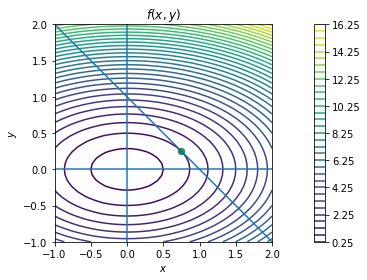

In [3]:
#Plotting the minimising point on my contour plot to verify that it agrees 
#with the constraint and the function value at the constrained minimum.
x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 40)
X, Y = np.meshgrid(x, y)
F = f(X, Y)
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)

#Using custom contours based on the answer so that it shows the constraint tangentially touching the line 
plt.contour(X, Y, F, np.arange(0.25,16.3,.5))
plt.colorbar()
plt.axis('scaled')

#Plotting the solution
plt.scatter([0.75],[0.25],s=40,c='seagreen')

#Plotting the constraint line
x_vals = np.linspace(-1,2,20)
plt.plot(x_vals,1-x_vals)
plt.show()

##### Solving the problem again, but this time by finding the Lagrangian dual function, which we will maximise to find the optimal dual variable $\nu$ and thus the optimal $\mathbf{x}$. Done by setting the derivative of the Largrangian with respect to $\mathbf{x}$ to zero, find the Largrangian dual function $g(\nu)$. 

$g(\upsilon) = \displaystyle \min_{x} L(x,v) = \min_{x} x_1^2 + 3x_2^2 + \upsilon(x_1+x_2 -1)$

$L_{x_1} = 2x_1 + \upsilon = 0 \Longrightarrow x_1 = -\frac{1}{2}\upsilon$   

$L_{x_2} = 6x_2 + \upsilon = 0 \Longrightarrow x_2 = -\frac{1}{6}\upsilon$

replacing gives ...

$g(\upsilon) = (-\frac{1}{2}\upsilon)^2 + 3(-\frac{1}{6}\upsilon)^2 + \upsilon[(-\frac{1}{2}\upsilon) + (-\frac{1}{2}\upsilon) - 1]$

$g(\upsilon) = \frac{1}{4}\upsilon^2 + \frac{1}{12}\upsilon^2 - \frac{1}{2}\upsilon^2 - \frac{1}{6}\upsilon^2 - \upsilon$

$g(\upsilon)= -\frac{1}{3}\upsilon^2 - \upsilon$

##### Maximising $g(\nu)$ with respect to $\nu$ and so find the optimal dual variable $\nu^\star$ and thus $g(\nu^\star)$.

$g(\upsilon)= -\frac{1}{3}\upsilon^2 - \upsilon$

$g'(\upsilon)= -\frac{2}{3}\upsilon - 1$

Setting to 0 yields...

$v^* = -\frac{3}{2} \Longrightarrow g(v^*) = 0.75$

#####  Using the relations derived earlier when finding the Lagrangian dual function to get $\mathbf{x}^\star$ from $\nu^\star$.  Thus find $f(\mathbf{x}^\star)$ and verify that it equals $g(\nu^\star)$.

$x^*_1 = -\frac{1}{2}\upsilon^* = -\frac{1}{2}(-\frac{3}{2})$   

$x^*_2 = -\frac{1}{6}\upsilon^* = -\frac{1}{2}(-\frac{3}{2})$

$\Longrightarrow x^* = (\frac{3}{4},\frac{1}{4})$

$f(x^*) = (\frac{3}{4})^2 + 3(\frac{1}{4})^2 = \frac{9}{16} + \frac{3}{16} = \frac{12}{16} = \frac{3}{4} = 0.75 = g(\upsilon^*)$


## Part 2. Quadratic programming

At the heart of the dual formulation of the large margin classifier (LMC) is the quadratic programme with constraints.  For example, for the hard LMC the dual Lagrange function to be *maximised* is:
\begin{align*}
          \newcommand{\balpha}{\mathbf{\alpha}}
          \newcommand{\bx}{\mathbf{x}}
        \max_{\balpha} & ~~ \sum_n \alpha_n - \frac{1}{2} \sum_{n,m}t_n t_m
                         \alpha_n\alpha_m \langle\bx_n, \bx_m\rangle\\
        \text{such that   }\quad & \alpha_n \ge 0, \quad \sum_n \alpha_n t_n = 0
\end{align*}
      
Below i will be solving the a simple example:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^2 + & 3x + 4y\\
        \text{such that   }\quad x, y & \ge 0\\
        x + 3y & \ge 15\\
        2x + 5y & \le 100\\
        3x + 4y & \le 80
\end{align*}

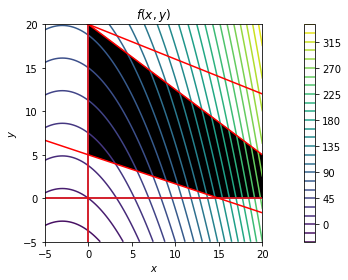

In [4]:
#Defining a new function to represent the problem
f = lambda x,y: 0.5*(x**2) + 3*x + 4*y

#Creaiting a meshgrid of required size - this is used as sort of a resolution for calculating contours
x = np.linspace(-5, 20, 100)
X, Y = np.meshgrid(x, x)
F = f(X, Y)

#Plotting the contours as earlier
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)
plt.contour(X, Y, F, 30)
plt.colorbar()
plt.axis('scaled')

#Plotting lines to represent each of the inequalities
#x + 3y >= 15
yline = 1/3*(15-x)
plt.plot(x, yline, 'red')

#2x + 5y <= 100
yline = 1/5*(100-2*x)
plt.plot(x, yline, 'red')

#3x + 4y <= 80
yline = 1/4*(80-3*x)
plt.plot(x, yline, 'red')

#x,y >= 0 
plt.plot(x, np.repeat(0,np.shape(x)[0]), 'red')
plt.plot(np.repeat(0,np.shape(x)[0]), x, 'red')

#Now creating ananonymous functions to represent each of the inequalities
f = lambda x,y : x + 3*y #x + 3y >= 15
g = lambda x,y : 2*x + 5*y #2x + 5y <= 100
h = lambda x,y : 3*x + 4*y #3x + 4y <= 80
j = lambda x : x #x,y >= 0 

#Using imshow to create a black region which satisfies the inequalities as the fillplots module had errors on my mac
d = np.linspace(-5, 20, 1000)
x,y = np.meshgrid(d,d)
z = ((f(x,y)>=15) & (g(x,y)<=100) & (h(x,y)<=80) & (j(x)>=0) & (j(y)>=0)).astype(int)
im = plt.imshow( z, extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys")

plt.show()


The problem can be written in standard form as:

\begin{align*}
  \min_{x, y} \tfrac{1}{2}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}^T
  \begin{bmatrix}
    1 & 0\\
    0 & 0
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}
  +
   \begin{bmatrix}
    3 \\ 4
  \end{bmatrix}^T
 \begin{bmatrix}
    x \\ y
  \end{bmatrix}\\
  \begin{bmatrix}
    -1 & 0\\
    0 & -1\\
    -1 & -3\\
    2 & 5\\
    3 & 4
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}  
  \preceq
  \begin{bmatrix}
    0 \\ 0 \\ -15 \\ 100 \\ 80
  \end{bmatrix}
\end{align*}

Note that all the inequality constraints have been gathered into the matrix $G$ and that since there are no equality constraints $A$ and $b$ do not need to be specified.  Note
that even though $y^2$ did not appear in the original objective, we had to include it with zero coefficients in P because the solver parameters must be defined using the full set of variables.  Even if certain variables only appear in constraints, they will still need to be expressed with zero coefficients in the objective parameters, and *vice versa*.

In [5]:

#Setting up the values for the specific problem.
#Note: The `tc='d'` argument ensures that the matrices are floating point numbers rather than integers.
P = matrix(np.diag([1,0]), tc='d') 
q = matrix(np.array([3,4]), tc='d')
G = matrix(np.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(np.array([0,0,-15,100,80]), tc='d')

#Solving the QP:
sol = solvers.qp(P, q, G, h)
solvers.options['show_progress'] = False

print('The solution is\n', sol['x'])
print('The objective is', sol['primal objective'])

#More information from the various key-value pairs in the dictionary.
for k, v in sol.items():
    print(k, v)

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  0e+00  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  1e-16  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  2e-16  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  1e-16  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  2e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  4e-17  1e-16
 6:  2.0062e+01  1.9974e+01  9e-02  8e-17  3e-16
 7:  2.0001e+01  2.0000e+01  9e-04  1e-16  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  9e-17  2e-16
Optimal solution found.
The solution is
 [ 7.13e-07]
[ 5.00e+00]

The objective is 20.00000617311241
x [ 7.13e-07]
[ 5.00e+00]

y 
s [ 7.13e-07]
[ 5.00e+00]
[ 3.74e-06]
[ 7.50e+01]
[ 6.00e+01]

z [ 1.67e+00]
[ 2.35e-08]
[ 1.33e+00]
[ 1.51e-08]
[ 2.28e-08]

status optimal
gap 8.788553731701216e-06
relative gap 4.394277440499348e-07
primal objective 20.00000617311241
dual objective 19.99999738455868
primal infeasibility 8.713234073596981e-17
dual infeasibility 1.9860273225978186e-16
primal slack 7.1318164088

##### Checking that the solution found through QP agrees with the earlier plot. 

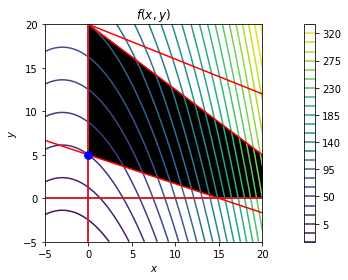

This shows that the solution is correct as it is the only point to touch that contour line


In [6]:
#Defining a new function to represent the problem
def f(x, y):
    return 0.5*(x**2) + 3*x + 4*y

#Creaiting a meshgrid of required size - this is used as sort of a resolution for calculating contours
x = np.linspace(-5, 20, 100)
X, Y = np.meshgrid(x, d)
F = f(X, Y)

#Plotting the contours as earlier
plt.axhline(0.0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x,y)$')
plt.axvline(0.0)

#Using custom contours based on the solutions so that it shows the constraint touching a contour line
val = f(sol['x'][0],sol['x'][1])-45
plt.contour(X, Y, F, np.arange(val,350,15))
plt.colorbar()
plt.axis('scaled')

#Plotting lines to represent each of the inequalities
#x + 3y >= 15
yline = 1/3*(15-x)
plt.plot(x, yline, 'red')

#2x + 5y <= 100
yline = 1/5*(100-2*x)
plt.plot(x, yline, 'red')

#3x + 4y <= 80
yline = 1/4*(80-3*x)
plt.plot(x, yline, 'red')

#x,y >= 0 
plt.plot(x, np.repeat(0,np.shape(x)[0]), 'red')
plt.plot(np.repeat(0,np.shape(x)[0]), x, 'red')

#Now creating ananonymous functions to represent each of the inequalities
f = lambda x,y : x + 3*y
g = lambda x,y : 2*x + 5*y
h = lambda x,y : 3*x + 4*y
j = lambda x : x

#Using imshow to create a black region which satisfies the inequalities
d = np.linspace(-5, 20, 1000)
x,y = np.meshgrid(d,d)
z = ((f(x,y)>=15) & (g(x,y)<=100) & (h(x,y)<=80) & (j(x)>=0) & (j(y)>=0)).astype(int)
im = plt.imshow( z, extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys")

#Plotting the solution point in blue
plt.scatter(sol['x'][0],sol['x'][1],c='blue',s=60,zorder = 50)
plt.show()
print('This shows that the solution is correct as it is the only point to touch that contour line')

## Part 3. Hard, large margin classifier

Writing a function that given a linearly separable training data set `X` and `t` will construct a large margin classifier for the data and to classify the data in `Xtest`. 

    sv, score = lmc(X, t, Xtest)

In [7]:
def lmc(X, t, Xtest):
    """
    Function that construct a linear hard margin classifier and classifies the data in Xtest
    
    input 
    -----
    X - array
        Training data points
    t - array
        Training data labels, binary case consisting of either -1 or 1
    Xtest - array
        Testing data
        
        
    output
    -----
    sv - array
        Indexs of support vectors within X
    score - array
        The signed distance from the hyperplane for each point in Xtest
    
    """
    
    #Initializing values and computing H
    m,n = X.shape
    t = t.reshape(-1,1)
    X_prime = np.matmul(X,X.T)
    H = np.outer(t,t) * X_prime

    #Converting into cvxopt compatable format, with floating point numbers forced
    P = matrix(H,tc='d')
    q = matrix(-np.ones((m, 1)),tc='d')
    G = matrix(-np.eye(m),tc='d')
    h = matrix(np.zeros(m),tc='d')
    A = matrix(t.reshape(1, -1),tc='d')
    b = matrix(np.zeros(1),tc='d')

    #Runining solver and extracting alpha
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])

    #Obtaining the indicies of support vectors
    S = (alphas > 1e-4).flatten()
    sv = np.nonzero(S)[0]

    #Computing b - the intercept
    b = np.mean(t[sv] - np.matmul((alphas*t).T,X_prime[sv].T).reshape(-1,1))
    
    #Calculating the scores for test data
    X_tp = np.matmul(Xtest,X[sv].T)

    score = np.matmul((alphas[sv]*t[sv]).T,X_tp.T) + b
    
    return sv,score

##### Testing my code on the following two-dimensional separable data.  And plotting the separating hyperplane and its margins, together with the support vectors.

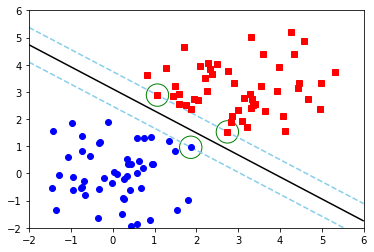

In [8]:
#Loading the data
separable = np.loadtxt('separable.txt')
X = separable[:,:2]
t = separable[:,2]

#Getting the meshgrid of testpoints in order to plot contours 
n = 1000
d = np.linspace(-2,6,n)
x,y = np.meshgrid(d,d)
Xtest = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))

sv, score = lmc(X, t, Xtest)

#Reshaping the data and plotting the contours from it
x = Xtest[:,0].reshape(-1,n)
y = Xtest[:,1].reshape(-1,n)
z = score.reshape(-1,n)
plt.contour(x,y,z,[-1,0,1],colors=['skyblue','black','skyblue'],linestyles = ['dashed','solid', 'dashed'])

#Plotting the datapoints X
plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

#Plotting the support vectors
SVs = X[sv]
plt.scatter(SVs[:,0],SVs[:,1],facecolors='none', edgecolors='g',s = 500)

##### Testing my code on the following two-dimensional non-separable data.  And plotting the separating hyperplane and its margins, together with the support vectors.

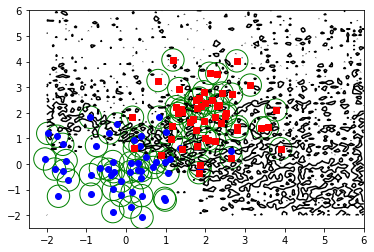

In [9]:
#Loading the data
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]

#Getting the meshgrid of testpoints in order to plot contours 
n = 100
d = np.linspace(-2,6,n)
x,y = np.meshgrid(d,d)
Xtest = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))

sv, score = lmc(X, t, Xtest)

#Reshaping the data and plotting the contours from it
x = Xtest[:,0].reshape(-1,n)
y = Xtest[:,1].reshape(-1,n)
z = score.reshape(-1,n)
plt.contour(x,y,z,[-1,0,1],colors=['skyblue','black','skyblue'],linestyles = ['dashed','solid', 'dashed'])

#Plotting the datapoints X
plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
plt.plot(X[t==1,0], X[t==1,1], 'rs')

#Plotting the support vectors
SVs = X[sv]
plt.scatter(SVs[:,0],SVs[:,1],facecolors='none', edgecolors='g',s = 500)

# Part 4. Soft, large margin classifier

Writing a new function using `lmc` as a basis that is able to detect and distinguish between non-linear patterns in the data. (i.e. A soft large margin classifier where the additional parameter `C` specifies the relative weight given to the emperical error versus the regularisation term. )

    sv, score = lsvm(X, t, C, Xtest)


In [10]:
def lsvm(X, t, C, Xtest):
    """
    Function that constructs a linear soft margin classifier and classifies the data in Xtest
    
    
    input 
    -----
    X - array
        Training data points
    t - array
        Training data labels, binary case consisting of either -1 or 1
    C - float
        Weight given to empirical error vs regularisation term
    Xtest - array
        Testing data
        
        
    output
    -----
    sv - array
        Indexs of support vectors within X
    score - array
        The signed distance from the hyperplane for each point in Xtest
    
    """
    #Initializing values and computing H
    m,n = X.shape
    t = t.reshape(-1,1)
    X_prime = np.matmul(X,X.T)
    H = np.outer(t,t) * X_prime
    
    #Converting into cvxopt compatable format, with floating point numbers forced
    P = matrix(H,tc='d')
    q = matrix(-np.ones((m, 1)),tc='d')
    G = matrix(np.vstack((np.eye(m)*-1,np.eye(m))),tc='d')
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)),tc='d')
    A = matrix(t.reshape(1, -1),tc='d')
    b = matrix(np.zeros(1),tc='d')

    #Runining solver and extracting alpha
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])

    #Obtaining the indicies of support vectors
    S = (alphas > 1e-4).flatten()
    sv = np.nonzero(S)[0]

    #Computing b - the intercept
    b = np.mean(t[sv] - np.matmul((alphas*t).T,X_prime[sv].T).reshape(-1,1))
    
    #Calculating the scores for test data
    X_tp = np.matmul(Xtest,X[sv].T)

    score = np.matmul((alphas[sv]*t[sv]).T,X_tp.T) + b
    
    return sv,score

Testing my function on a simple data set. Where the data is drawn from two isotropic Gaussian distributions centred at $(0, 0)$ and $(2, 2)$, so the optimal separating hyperplane, in the limit of a large amount of data, is the perpendicular bisector of the line joining the centres.  As before, i am also plotting the separating hyperplane and the support vectors along with the contour plot of the score across the domain.


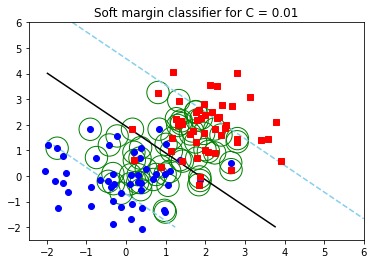

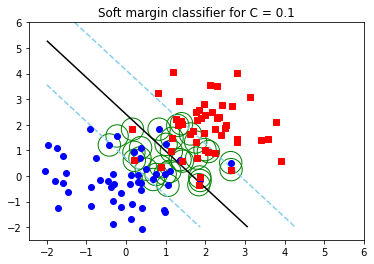

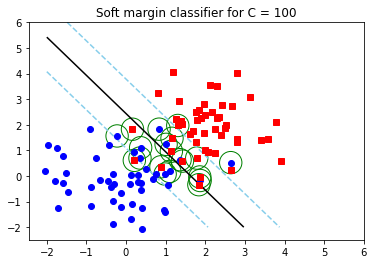

In [11]:
#Loading the data
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]

#Getting the meshgrid of testpoints in order to plot contours 
n = 100
d = np.linspace(-2,6,n)
x,y = np.meshgrid(d,d)
Xtest = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))

#Precalculating the meshgrid for Xtest
x = Xtest[:,0].reshape(-1,n)
y = Xtest[:,1].reshape(-1,n)

for C in [0.01,0.1,100]:
    
    plt.title('Soft margin classifier for C = '+str(C))
    sv, score = lsvm(X, t, C, Xtest)

    #Reshaping the data and plotting the contours from it
    z = score.reshape(-1,n)
    plt.contour(x,y,z,[-1,0,1],colors=['skyblue','black','skyblue'],linestyles = ['dashed','solid', 'dashed'])

    #Plotting the datapoints X
    plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
    plt.plot(X[t==1,0], X[t==1,1], 'rs')

    #Plotting the support vectors
    SVs = X[sv]
    plt.scatter(SVs[:,0],SVs[:,1],facecolors='none', edgecolors='g',s = 500)
    plt.show()

# Part 5. Nonlinear SVM

Finally, using my `lsvm` code as a basis, I will write a new function to implement a fully nonlinear SVM with a user-specfied kernel function with the following signature:

    sv, score = svm(X, t, C, kernel, Xtest)
    
where the `X`, `t`, `C` and `Xtest` are as before and `kernel` is a function that evaluates a kernel and can be called by your svm to evaluate the similarity of any pair of vectors:

    ip = kernel(x, y)     # inner product in some high-dimensional space


In [12]:
def rbf(x, y, gamma=1):
    """RBF kernel with precision gamma."""
    d = x-y
    return np.exp(-gamma*np.dot(d, d))

def linear_kernel(x1, x2):
    """Linear kernel"""
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    """Linear kernel with polynomial order p"""
    return (1 + np.dot(x, y)) ** p

def svm(X, t, C, kernel, Xtest):
    """
    Function that constructs a nonlinear SVM classifier with a user specified kernel and classifies the data in Xtest
    
    input 
    -----
    X - array
        Training data points
    t - array
        Training data labels, binary case consisting of either -1 or 1
    C - float
        Weight given to empirical error vs regularisation term
    kernel - function
        Kernel to be used with the svm to calculate the inner products
    Xtest - array
        Testing data
        
        
    output
    -----
    sv - array
        Indexs of support vectors within X
    score - array
        The signed distance from the hyperplane for each point in Xtest
    
    """
    #Initializing values
    m,n = X.shape
    t = t.reshape(-1,1)
    
    #Computing the H matrix using the kernel
    X_prime = np.zeros((m,m))
    for j in np.arange(m):
        for k in np.arange(j,m):
            
            value = kernel(X[j],X[k])
            
            X_prime[j,k] = value
            X_prime[k,j] = value

    
    H = np.outer(t,t) * X_prime
    
    #Converting into cvxopt compatable format, with floating point numbers forced
    P = matrix(H,tc='d')
    q = matrix(-np.ones((m, 1)),tc='d')
    G = matrix(np.vstack((np.eye(m)*-1,np.eye(m))),tc='d')
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)),tc='d')
    A = matrix(t.reshape(1, -1),tc='d')
    b = matrix(np.zeros(1),tc='d')
    
    #Runining solver and extracting alpha
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])

    #Obtaining the indicies of support vectors
    S = (alphas > 1e-4).flatten()
    sv = np.nonzero(S)[0]

    #Computing b - the intercept
    b = np.mean(t[sv] - np.matmul((alphas*t).T,X_prime[sv].T).reshape(-1,1))
    
    #Calculating the scores for test data
    row = []
    for vec in Xtest:
        for ID in sv:
            row.append(kernel(vec,X[ID]))
        
    X_tp = np.array(row).reshape(-1,len(sv))

    score = np.matmul((alphas[sv]*t[sv]).T,X_tp.T) + b
    
    return sv, score




In [13]:
def displaycontours(C,ker):
    """
    Function that displays the meaninigful contour lines of a nonlinear SVM on the preloaded dataset X
    
    input 
    -----
    C - float
        Weight given to empirical error vs regularisation term
    kernel - function
        Kernel to be used with the svm to calculate the inner products
    
    """
    
    #Formulating meshgrid to allow the calculation of contours
    n = 100
    x = np.linspace(-2,6,n)
    y = np.linspace(-2,5,n)
    x,y = np.meshgrid(x,y)

    Xtest = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))

    sv, score = svm(X, t, C, ker, Xtest)
    
    #Reshaping the data and plotting the contours from it    
    x = Xtest[:,0].reshape(-1,n)
    y = Xtest[:,1].reshape(-1,n)
    z = score.reshape(-1,n)
    
    plt.contour(x,y,z,[-1,0,1],colors=['skyblue','black','skyblue'],linestyles = ['dashed','solid', 'dashed'])

    #Plotting the datapoints X
    plt.plot(X[t==-1,0], X[t==-1,1], 'bo')
    plt.plot(X[t==1,0], X[t==1,1], 'rs')

    #Plotting the support vectors
    SVs = X[sv]
    plt.scatter(SVs[:,0],SVs[:,1],facecolors='none', edgecolors='g',s = 500)
    plt.xlim(plt.xlim()[0],4.3)

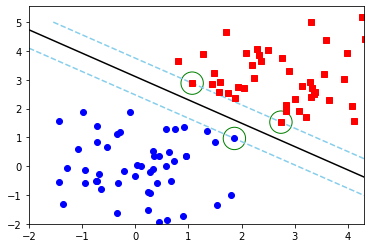

In [14]:
#Test for seperable data only - To see if you get the same results as before
X = separable[:,:2]
t = separable[:,2]
displaycontours(1000,lambda x,y: linear_kernel(x, y))

Testing my code on the non-separable data above using a linear kernel, the RBF kernel and the polynomial kernel. Here cross-validation is used to choose the best parameters.

In [15]:
# for KFold cross-validation
from sklearn.model_selection import KFold,train_test_split

kfold = KFold(n_splits=5)    # 5 fold CV here.

def GridSearchClf(C_vals,param_vals,kernel):
    """
    Function that preforms a grid search over parameter values and regularisation values using cross validation for nonlinear SVMs on the preloaded dataset X, with a user specified kernel. 
    
    input 
    -----
    C_vals - float
        Regulatrisation parameter values to perform the grid search with
    param_vals - float
        Parameter values for the kernel to perform the grid search with
    kernel - function
        Kernel to be used with the svm to calculate the inner products
        
    output
    -----
    
    overall - array 
        Accuracy scores of the different classifiers with the specified parameter values
    
    """
    #Iterating through parameter values 
    for p in param_vals:
    
        #Forming the kernel for each parameter value
        ker = lambda x,y: kernel(x,y,p)
        cvs = []
    
        #Iterating though regularisation terms
        for c in C_vals:

            #Performing cross validation
            S = []
            for train, validation in kfold.split(X):
    
                _, t_pred = svm(X[train],t[train], c, ker, X[validation])
    
                t_pred = np.array((t_pred >0),dtype=float)
                t_pred[t_pred == 0] = -1
    
                S.append(np.mean(t_pred == t[validation]))
    
            cvs.append(np.mean(S))
    
        if p == param_vals[0]:
            overall = np.array(cvs)
        else:
            overall = np.vstack((overall,cvs))
    
    return overall

The RBF kernel performed best when C = 0.11 gamma = 0.010, achieving an accuracy of 0.89


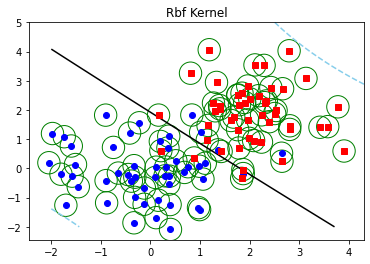

The Polynomial kernel performed best when C = 0.01 p = 1.0, achieving an accuracy of 0.89


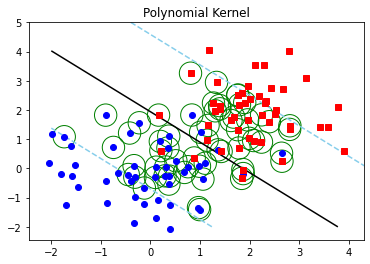

The Linear kernel performed best when C = 0.01, achieving an accuracy of 0.89


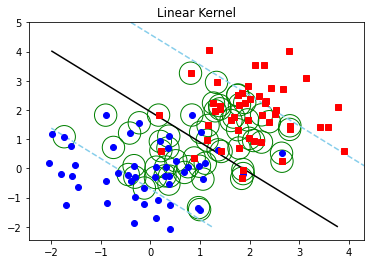

In [16]:
nonseparable = np.loadtxt('nonseparable.txt')
X = nonseparable[:,:2]
t = nonseparable[:,2]

#RBF kernel ------------------------------
param_vals = np.logspace(-2,4,20)
C_vals = np.logspace(-2,2,20)

overall = GridSearchClf(C_vals,param_vals,lambda x,y,p: rbf(x,y,gamma=p))

IDs = np.unravel_index(np.argmax(overall), overall.shape)
print('The RBF kernel performed best when C = %.2f gamma = %.3f, achieving an accuracy of %.2f'%(C_vals[IDs[1]],param_vals[IDs[0]],overall[IDs]))
displaycontours(C_vals[IDs[1]],lambda x,y: rbf(x,y,gamma=param_vals[IDs[0]]))
plt.title('Rbf Kernel');
plt.show()

#Polynomial Kernel ------------------------------
param_vals = np.arange(1,11)

overall = GridSearchClf(C_vals,param_vals,lambda x,y,p: polynomial_kernel(x, y, p=p))

IDs = np.unravel_index(np.argmax(overall), overall.shape)
print('The Polynomial kernel performed best when C = %.2f p = %.1f, achieving an accuracy of %.2f'%(C_vals[IDs[1]],param_vals[IDs[0]],overall[IDs]))
displaycontours(C_vals[IDs[1]],lambda x,y: polynomial_kernel(x,y,p=param_vals[IDs[0]]))
plt.title('Polynomial Kernel');
plt.show()

#Linear Kernel ------------------------------
param_vals = [1]

overall = GridSearchClf(C_vals,param_vals,lambda x,y,p: linear_kernel(x, y))

ID = np.argmax(overall)

print('The Linear kernel performed best when C = %.2f, achieving an accuracy of %.2f'%(C_vals[ID],overall[ID]))
displaycontours(C_vals[ID] ,lambda x,y: linear_kernel(x, y))
plt.title('Linear Kernel');